In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_excel("C:\\Users\\aparn\\Desktop\\ml\\training.xlsx")
testing_df = pd.read_excel("C:\\Users\\aparn\\Desktop\\ml\\test.xlsx")

In [3]:
#Giving each non-numeric Atribute value a numeric value
df.replace({
    'workclass': {'Private': 0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4, 
                  'State-gov':5, 'Without-pay':6, 'Never-worked':7},
    'marital-status':{'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 
                      'Married-spouse-absent': 5, 'Married-AF-spouse': 6},
    'occupation':{'Tech-support':0, 'Craft-repair':1, 'Other-service':2, 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5, 
                  'Handlers-cleaners':6, 'Machine-op-inspct':7, 'Adm-clerical':8, 'Farming-fishing':9, 'Transport-moving':10, 
                  'Priv-house-serv':11, 'Protective-serv':12, 'Armed-Forces':13},
    'relationship':{'Wife':0, 'Own-child':1, 'Husband':2, 'Not-in-family':3, 'Other-relative':4, 'Unmarried':5},
    'race':{'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2, 'Other':3, 'Black':4},
    'sex':{'Female':0, 'Male':1},
    'native-country':{'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4, 'Germany':5, 
                       'India':7, 'Japan':8, 'Greece':9, 'South':10, 'China':11, 'Cuba':12, 
                      'Iran':13, 'Honduras':14, 'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19, 
                      'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24, 'Laos':25, 'Ecuador':26, 
                      'Taiwan':27, 'Haiti':28, 'Columbia':29, 'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 
                      'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36, 'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 
                      'Holand-Netherlands':40},
    'class':{'>50K':0, '<=50K':1},
},regex=True,inplace=True)
df['native-country'].replace('Outlying-US(Guam-USVI-etc)',6,inplace=True)
testing_df.replace({
    'workclass': {'Private': 0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4, 
                  'State-gov':5, 'Without-pay':6, 'Never-worked':7},
    'marital-status':{'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 
                      'Married-spouse-absent': 5, 'Married-AF-spouse': 6},
    'occupation':{'Tech-support':0, 'Craft-repair':1, 'Other-service':2, 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5, 
                  'Handlers-cleaners':6, 'Machine-op-inspct':7, 'Adm-clerical':8, 'Farming-fishing':9, 'Transport-moving':10, 
                  'Priv-house-serv':11, 'Protective-serv':12, 'Armed-Forces':13},
    'relationship':{'Wife':0, 'Own-child':1, 'Husband':2, 'Not-in-family':3, 'Other-relative':4, 'Unmarried':5},
    'race':{'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2, 'Other':3, 'Black':4},
    'sex':{'Female':0, 'Male':1},
    'native-country':{'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4, 'Germany':5, 
                       'India':7, 'Japan':8, 'Greece':9, 'South':10, 'China':11, 'Cuba':12, 
                      'Iran':13, 'Honduras':14, 'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19, 
                      'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24, 'Laos':25, 'Ecuador':26, 
                      'Taiwan':27, 'Haiti':28, 'Columbia':29, 'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 
                      'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36, 'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 
                      'Holand-Netherlands':40},
    'class':{'>50K':0, '<=50K':1},
},regex=True,inplace=True)
testing_df['native-country'].replace(' Outlying-US(Guam-USVI-etc)',6,inplace=True)

In [4]:
def get_mean(df, column, val):
    mean_val = df[df[column] != val][column].astype(float).mean()
    return mean_val

workclass_mean = get_mean(df,'workclass',' ?')
occupation_mean = get_mean(df,'occupation',' ?')
native_country_mean = get_mean(df,'native-country',' ?')

t_workclass_mean = get_mean(testing_df,'workclass',' ?')
t_occupation_mean = get_mean(testing_df,'occupation',' ?')
t_native_country_mean = get_mean(testing_df,'native-country',' ?')

print(workclass_mean,occupation_mean,native_country_mean)
print(t_workclass_mean,t_occupation_mean,t_native_country_mean)

df['workclass'].replace(' ?',round(workclass_mean),inplace=True)
df['occupation'].replace(' ?',round(occupation_mean),inplace=True)
df['native-country'].replace(' ?',round(native_country_mean),inplace=True)
testing_df['workclass'].replace(' ?',round(t_workclass_mean),inplace=True)
testing_df['occupation'].replace(' ?',round(t_occupation_mean),inplace=True)
testing_df['native-country'].replace(' ?',round(t_native_country_mean),inplace=True)

0.7371196094385679 4.7352366690539744 1.507380073800738
0.7536884710797754 4.721123081945804 1.415318298244518


In [5]:
# Discretizing age
age_edges = [0,18,25,34,42,50,70,100]  
age_labels = [1, 2, 3, 4, 5, 6, 7]

age_edges_test = [0,18,25,34,42,50,70,100]  
age_labels_test = [1, 2, 3, 4, 5, 6, 7] 

# Binning output in new column
df['discrete_age'] = pd.cut(df['age'], bins=age_edges, labels=age_labels, right=False)
testing_df['discrete_age'] = pd.cut(testing_df['age'], bins=age_edges_test, labels=age_labels_test, right=False)

# Discretizing fnlwgt
wt_mean = df["fnlwgt"].mean()
wt_edges = [0, wt_mean, 1600000]  
wt_labels = [1, 2]  

wt_mean_test = testing_df["fnlwgt"].mean()
wt_edges_test = [0, wt_mean_test, 1600000]  
wt_labels_test = [1, 2]  

# Binning output in new column
df['discrete_fnlwgt'] = pd.cut(df['fnlwgt'], bins=wt_edges, labels=wt_labels, right=False)
testing_df['discrete_fnlwgt'] = pd.cut(testing_df['fnlwgt'], bins=wt_edges_test, labels=wt_labels_test, right=False)

# Discretizing capital-gain
gain_mean = get_mean(df,'capital-gain',0)
gain_edges = [0, 1, gain_mean, 100000]  
gain_labels = [1, 2, 3]  

gain_mean_test = get_mean(testing_df,'capital-loss',0)
gain_edges_test = [0, 1, gain_mean_test, 100000]  
gain_labels_test = [1, 2, 3]  

# Binning output in new column
df['discrete_capital-gain'] = pd.cut(df['capital-gain'], bins=gain_edges, labels=gain_labels, right=False)
testing_df['discrete_capital-gain'] = pd.cut(testing_df['capital-gain'], bins=gain_edges_test, labels=gain_labels_test, right=False)

# Discretizing capital-loss
loss_mean = get_mean(df,'capital-loss',0)
loss_edges = [0, 1, loss_mean, 5000]  
loss_labels = [1, 2, 3]

loss_mean_test = get_mean(testing_df,'capital-loss',0)
loss_edges_test = [0, 1, loss_mean_test, 5000]  
loss_labels_test = [1, 2, 3]

# Binning output in new column
df['discrete_capital-loss'] = pd.cut(df['capital-loss'], bins=loss_edges, labels=loss_labels, right=False)
testing_df['discrete_capital-loss'] = pd.cut(testing_df['capital-loss'], bins=loss_edges_test, labels=loss_labels_test, right=False)

# Discretizing hours-per-week
hw_edges = [0,12,30,48,60,78,100]  
hw_labels = [1,2,3,4,5,6]

hw_edges_test = [0,12,30,48,60,78,100]  
hw_labels_test = [1,2,3,4,5,6]

# Binning output in new column
df['discrete_hours-per-week'] = pd.cut(df['hours-per-week'], bins=hw_edges, labels=hw_labels, right=False)
testing_df['discrete_hours-per-week'] = pd.cut(testing_df['hours-per-week'], bins=hw_edges_test, labels=hw_labels_test, right=False)


In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,discrete_age,discrete_fnlwgt,discrete_capital-gain,discrete_capital-loss,discrete_hours-per-week
0,39,5,77516,Bachelors,13,2,8,3,0,1,2174,0,40,0,1,4,1,2,1,3
1,50,1,83311,Bachelors,13,0,4,2,0,1,0,0,13,0,1,6,1,1,1,2
2,38,0,215646,HS-grad,9,1,6,3,0,1,0,0,40,0,1,4,2,1,1,3
3,53,0,234721,11th,7,0,6,2,4,1,0,0,40,0,1,6,2,1,1,3
4,28,0,338409,Bachelors,13,0,5,0,4,0,0,0,40,12,1,3,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,Assoc-acdm,12,0,0,0,0,0,0,0,38,0,1,3,2,1,1,3
32557,40,0,154374,HS-grad,9,0,7,2,0,1,0,0,40,0,0,4,1,1,1,3
32558,58,0,151910,HS-grad,9,4,8,5,0,0,0,0,40,0,1,6,1,1,1,3
32559,22,0,201490,HS-grad,9,2,8,1,0,1,0,0,20,0,1,2,2,1,1,2


<Axes: >

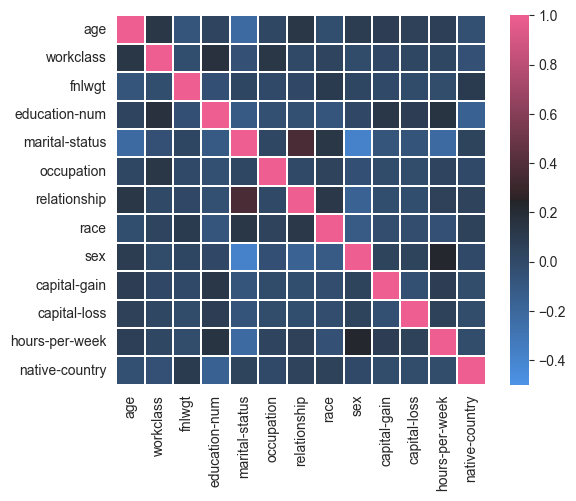

In [7]:
data= df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14]]
trainData = df.iloc[:,[1,4,5,6,7,8,9,10,13,15,16,17,18,19,14]]
testData = testing_df.iloc[:,[1,4,5,6,7,8,9,10,13,15,16,17,18,19,14]]
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

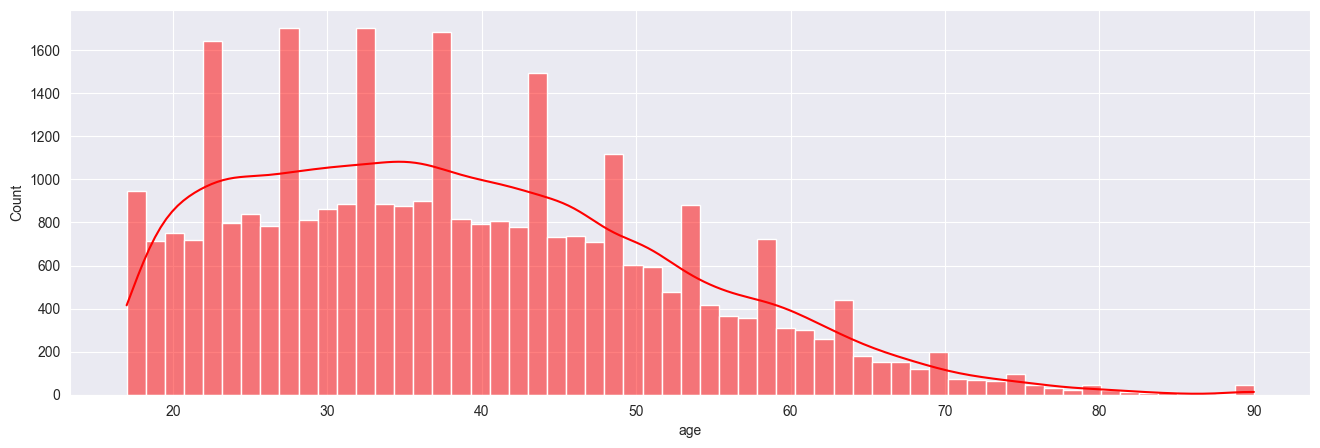

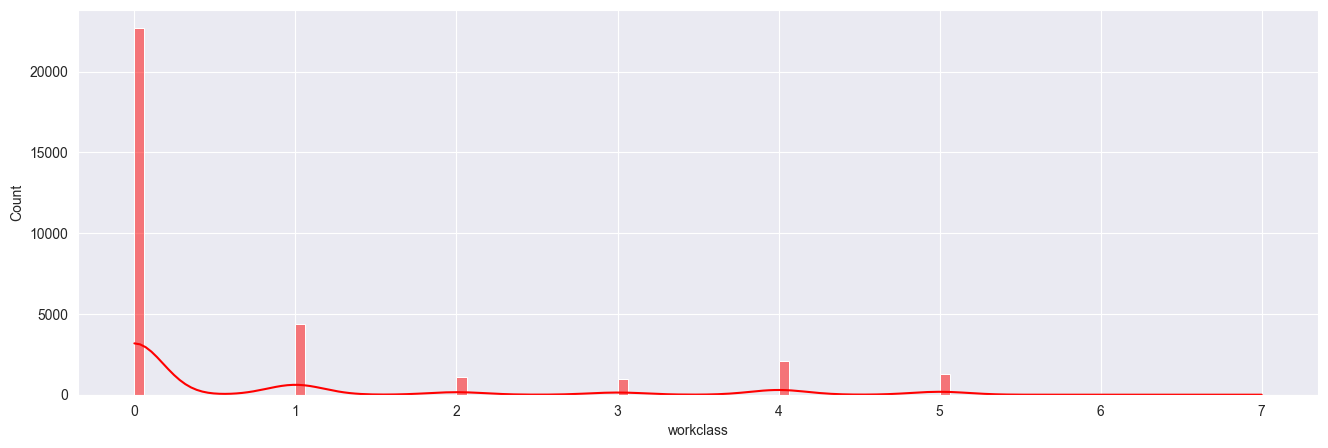

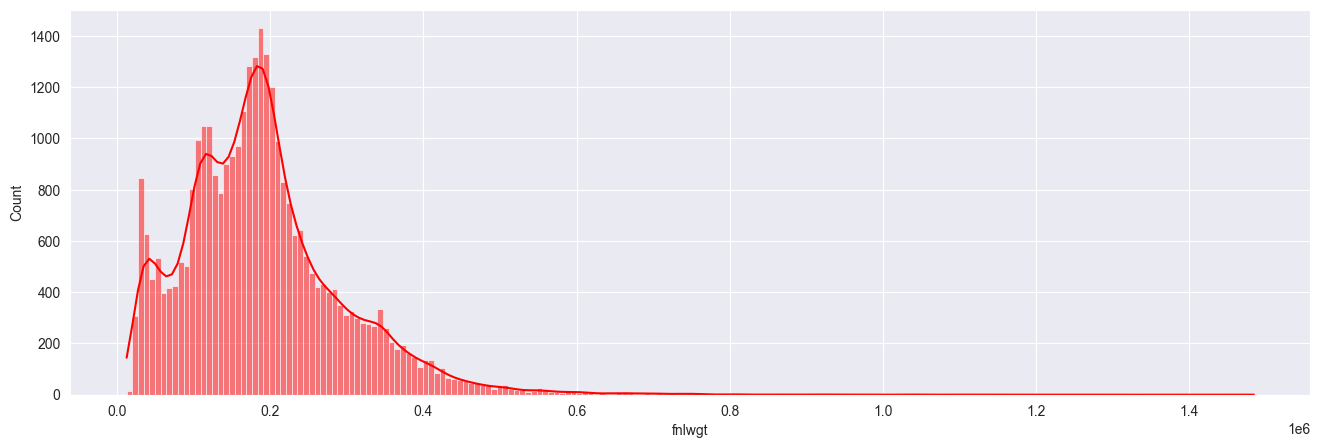

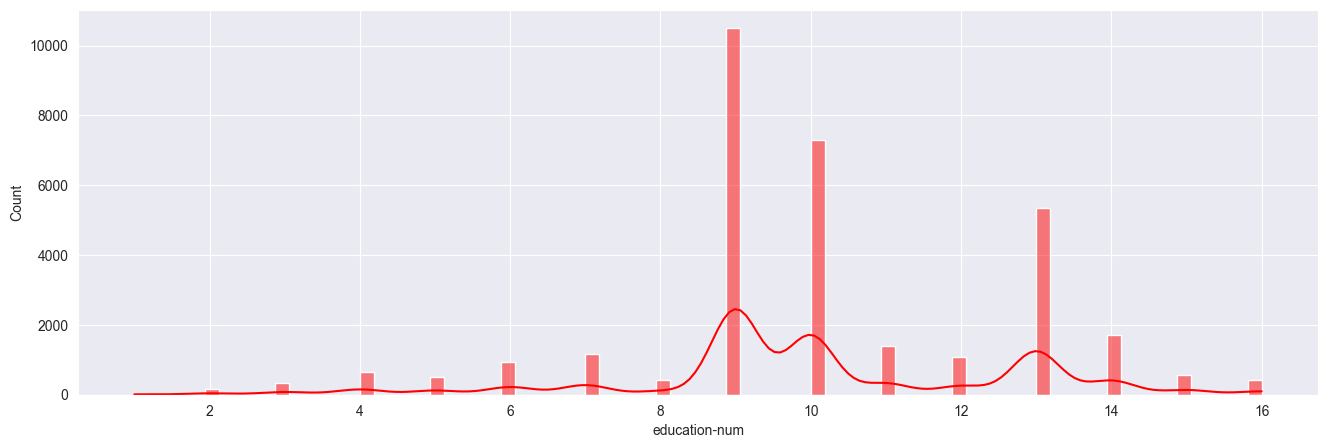

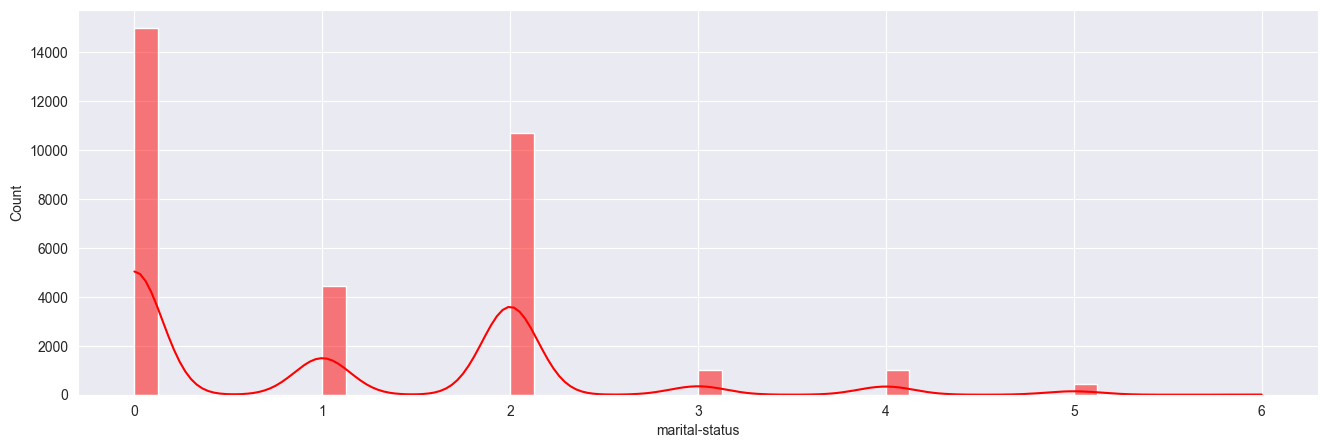

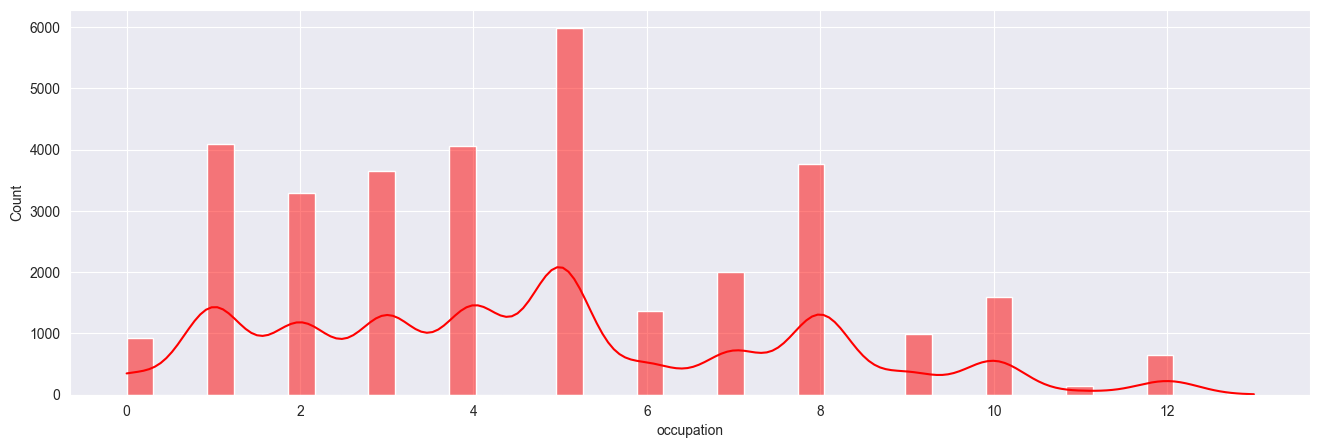

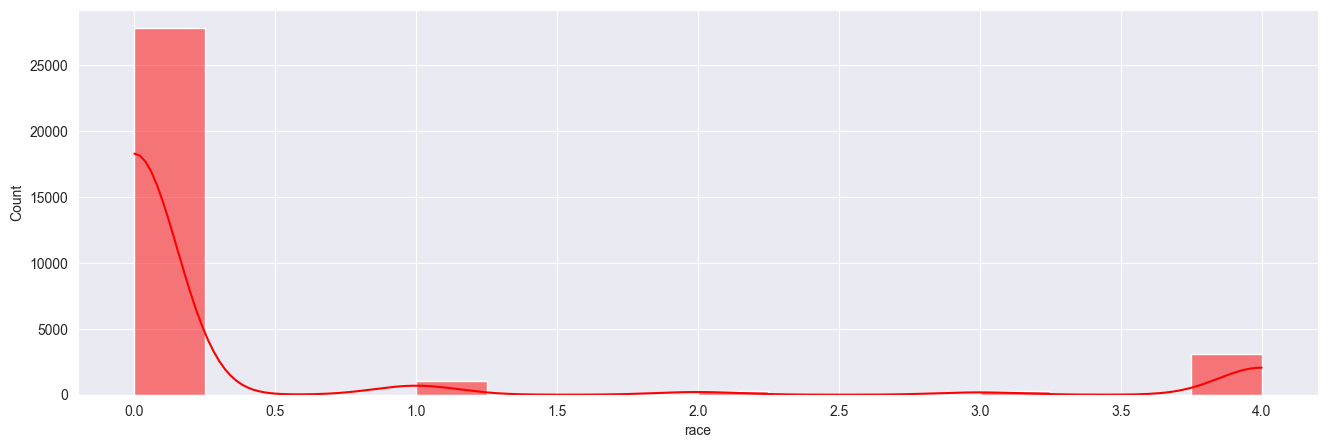

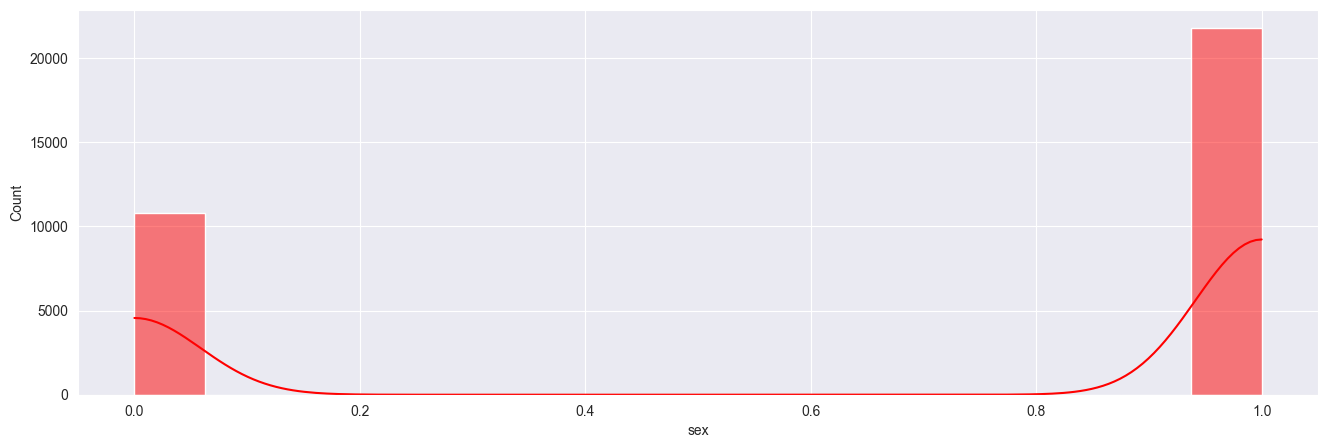

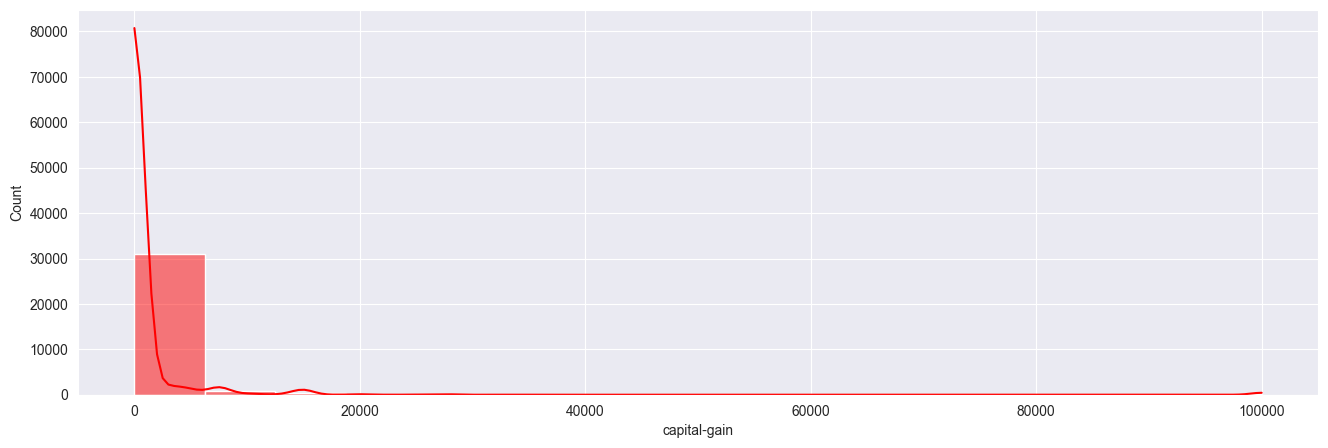

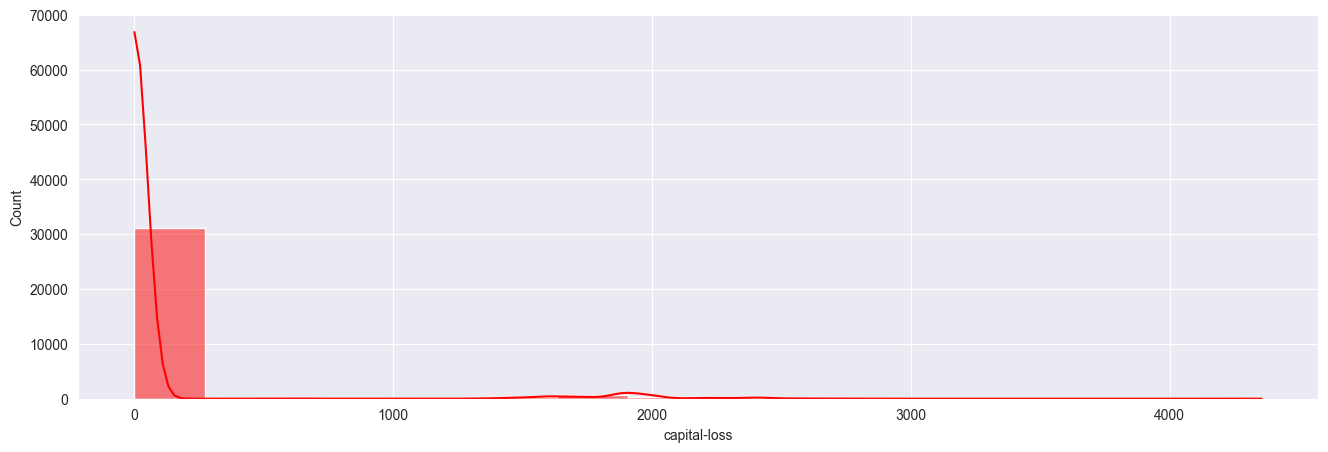

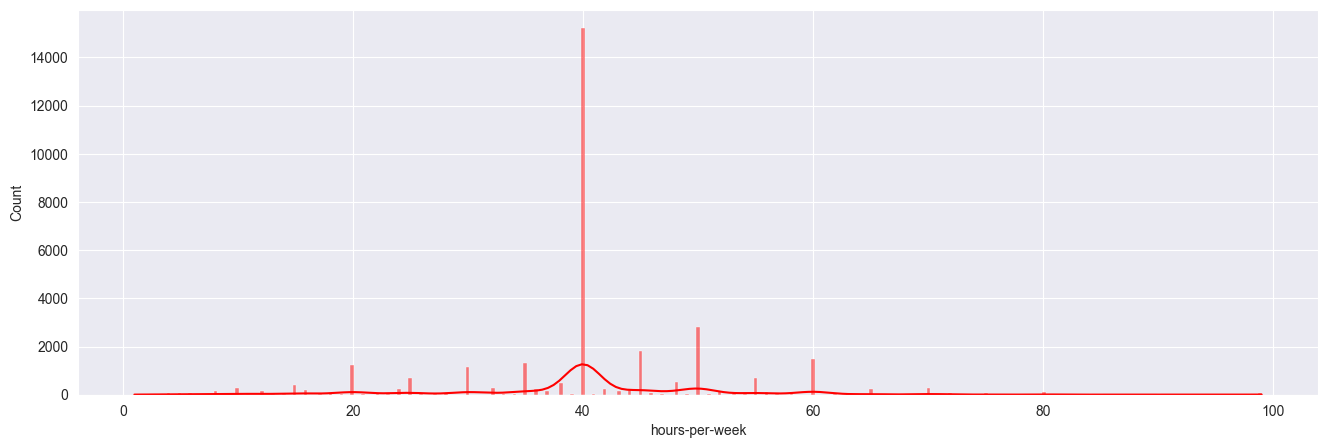

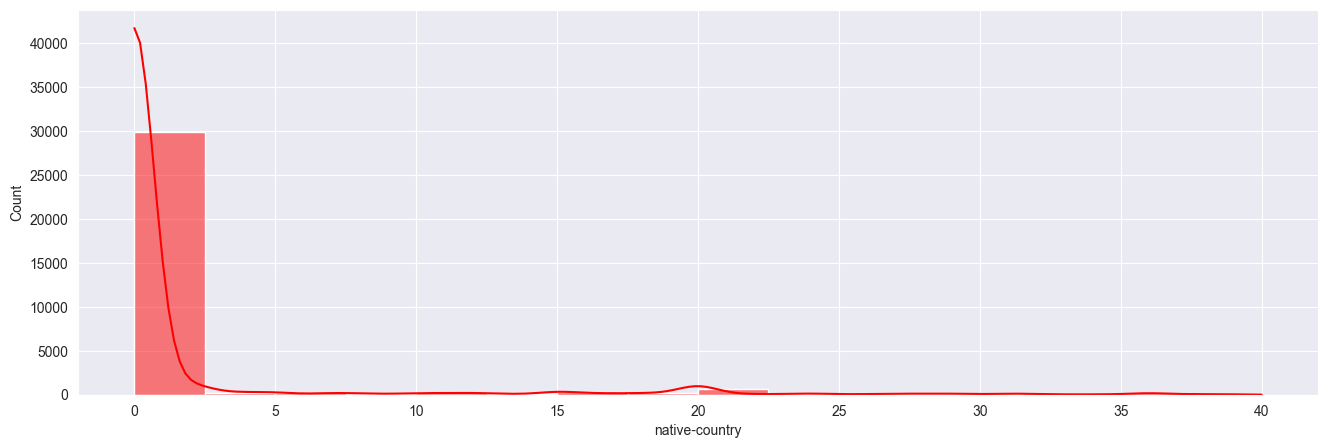

In [8]:
cols=["age","workclass","fnlwgt","education-num","marital-status","occupation","race","sex","capital-gain",
      "capital-loss","hours-per-week","native-country"]

for i in range(12):
    fig, axes = plt.subplots(1, 1, figsize=(16, 5), sharey=True)
    sns.histplot(data, ax=axes, x=cols[i], kde=True, color='r')


#  Naive Bayes 

In [ ]:
class NaiveBayesClassifier():
    def get_prior_probability(self,data, Y):
        unique_values = sorted(list(data[Y].unique()))
        prior_probabilities = []
        for i in unique_values:
            prior_probabilities.append(len(data[data[Y]==i])/len(data))
        return prior_probabilities
    
    
    def get_probability(self,data, col, value, Y, label):
        data = data[data[Y]==label]
        probability = len(data[data[col]==value]) / len(data)
        return probability
    
    def fit(self,data, X, Y):

        attributes = list(data.columns)[:-1]
        prior_probability = self.get_prior_probability(data, Y)
        Y_pred = []
        
        for x in X:
            unique_values = sorted(list(data[Y].unique()))
            maximum_likelihood_function_values = [1]*len(unique_values)
            for j in range(len(unique_values)):
                for i in range(len(attributes)):
                    maximum_likelihood_function_values[j] *= self.get_probability(data, attributes[i], x[i], Y, unique_values[j])

            posterior_probability = [1]*len(unique_values)
            for j in range(len(unique_values)):
                posterior_probability[j] = maximum_likelihood_function_values[j] * prior_probability[j]

            Y_pred.append(np.argmax(posterior_probability))

        return np.array(Y_pred) 
    

In [ ]:
X_test = testData.iloc[:,:-1].values
Y_test = testData.iloc[:,-1].values
X_train = trainData.iloc[:,:-1].values
Y_train = trainData.iloc[:,-1].values
naive_bayes_classifier = NaiveBayesClassifier()
Y_pred = naive_bayes_classifier.fit(trainData, X_train, "class")

print(confusion_matrix(Y_train, Y_pred))
print(accuracy_score(Y_pred,Y_test))
Y_pred = naive_bayes_classifier.fit(trainData, X_test, "class")
print(accuracy_score(Y_pred,Y_test))
print(f1_score(Y_test, Y_pred))

In [ ]:
combined_dataset =pd.concat([df,testing_df]).iloc[:,[1,4,5,6,7,8,9,10,13,15,16,17,18,19,14]]
new_df, new_testing_df = train_test_split(combined_dataset, test_size=0.3333333333)

In [ ]:
X_test = new_testing_df.iloc[:,:-1].values
Y_test = new_testing_df.iloc[:,-1].values
X_train = new_training_df.iloc[:,:-1].values
Y_test = new_training_df.iloc[:,-1].values
naive_bayes_classifier = NaiveBayesClassifier()
Y_pred = naive_bayes_classifier.fit(new_df, X_test, "class")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_pred,Y_test))
Y_pred = naive_bayes_classifier.fit(new_df, X_train, "class")
print(accuracy_score(Y_pred,Y_train))
print(f1_score(Y_test, Y_pred))

# Logistic Regression

In [24]:
class LogisticRegressionClassifier():
        
    def __init__(self):
        self.w = None
        self.b = None
        self.costs = None
        self.cnt=None
    
    def fit(self,X,Y,number_of_iterations,learning_rate):
        n,m = X.shape
        costs=[]
        self.cnt=number_of_iterations
        self.w,self.b = self.initialize(n)
        for i in range(number_of_iterations):
            yn = self.get_Yn(X)
            cost = -(1/m)*np.sum(Y*np.log(yn) + (1 - Y)*np.log(1 - yn))
            costs.append(cost)
            self.gradient_descent(m,yn,X,Y,learning_rate)
            
            if(i%(number_of_iterations/10) == 0):
                print("cost after ", i, "iteration is : ", cost)

        self.costs = costs
    
    def gradient_descent(self,m,yn,X,Y,learning_rate):
        dw,db = (1/m)*np.dot(yn-Y,X.T),(1/m)*np.sum(yn-Y)
        self.w -= learning_rate*dw.T
        self.b -= learning_rate*db
    
    def sigmoid_function(self,z):
        return 1/(1+np.exp(-z))
    
    def get_Yn(self,X):
        z = np.dot(self.w.T,X) + self.b
        
        
        if z[0][np.abs(z).argmax()]>0:
            z/=z[0][np.abs(z).argmax()]
        return self.sigmoid_function(z)
    
    def initialize(self,n):
        return np.zeros((n,1)),0
    
    def predict(self,X_test, Y_test):
    
        yn= self.get_Yn(X_test)
        yn = yn > 0.5
        yn = np.array(yn, dtype = 'int64')
        print(yn)
        accuracy = (1 - np.sum(np.absolute(yn - Y_test))/Y_test.shape[1])*100
        print(round(accuracy, 2),"%")
    
    def plot(self):
        plt.plot(np.arange(self.cnt), self.costs)
        plt.show()
    

In [25]:
X_train = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
Y_train = df.iloc[:,14]
X_test = testing_df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
Y_test = testing_df.iloc[:,14]

for i in range(X_train.shape[1]):
    X_train.iloc[:,i] = (X_train.iloc[:,i] - np.mean(X_train.iloc[:,i]))/np.std(X_train.iloc[:,i])
    
for i in range(X_test.shape[1]):
    X_test.iloc[:,i] = (X_test.iloc[:,i] - np.mean(X_test.iloc[:,i]))/np.std(X_test.iloc[:,i])

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
    
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [26]:
logistic_classifier = LogisticRegressionClassifier()
logistic_classifier.fit(X_train,Y_train,100000,0.01)


cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.34687058310002905
cost after  20000 iteration is :  0.34494646186800043
cost after  30000 iteration is :  0.3445341586268787
cost after  40000 iteration is :  0.3444240294650117
cost after  50000 iteration is :  0.3443918327088344
cost after  60000 iteration is :  0.3443819899049617
cost after  70000 iteration is :  0.3443789089439766
cost after  80000 iteration is :  0.34437793202222333
cost after  90000 iteration is :  0.34437762002606664


In [27]:
logistic_classifier.predict(X_test,Y_test)

[[1 1 1 ... 0 0 0]]
84.28 %


In [28]:
logistic_classifier.predict(X_train,Y_train)

[[1 1 1 ... 1 1 0]]
84.19 %


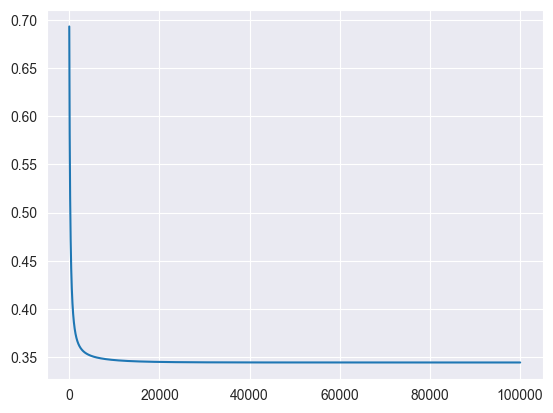

In [29]:
logistic_classifier.plot()

In [34]:
combined_dataset =pd.concat([df,testing_df]).iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14]]
new_df, new_testing_df = train_test_split(combined_dataset, test_size=0.3333333333)

new_X_train = new_df.iloc[:,:-1]
new_Y_train = new_df.iloc[:,-1]
new_X_test = new_testing_df.iloc[:,:-1]
new_Y_test = new_testing_df.iloc[:,-1]

for i in range(new_X_train.shape[1]):
    new_X_train.iloc[:,i] = (new_X_train.iloc[:,i] - np.mean(new_X_train.iloc[:,i]))/np.std(new_X_train.iloc[:,i])
    
for i in range(new_X_test.shape[1]):
    new_X_test.iloc[:,i] = (new_X_test.iloc[:,i] - np.mean(new_X_test.iloc[:,i]))/np.std(new_X_test.iloc[:,i])

new_X_train = new_X_train.values
new_Y_train = new_Y_train.values
new_X_test = new_X_test.values
new_Y_test = new_Y_test.values

new_X_train = new_X_train.T
new_Y_train = new_Y_train.reshape(1, new_X_train.shape[1])

new_X_test = new_X_test.T
new_Y_test = new_Y_test.reshape(1, new_X_test.shape[1])

In [35]:
new_logistic_classifier = LogisticRegressionClassifier()
new_logistic_classifier.fit(new_X_train,new_Y_train,100000,0.01)



cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.3479031090743045
cost after  20000 iteration is :  0.3460319556382572
cost after  30000 iteration is :  0.34562064123342123
cost after  40000 iteration is :  0.34550764335888484
cost after  50000 iteration is :  0.34547363832082284
cost after  60000 iteration is :  0.34546293142211254
cost after  70000 iteration is :  0.34545947786480213
cost after  80000 iteration is :  0.34545834894731176
cost after  90000 iteration is :  0.34545797713890003


In [36]:
new_logistic_classifier.predict(new_X_test,new_Y_test)

[[1 1 1 ... 0 0 1]]
84.45 %


In [37]:
logistic_classifier.predict(new_X_train,new_Y_train)

[[1 1 0 ... 1 1 1]]
84.08 %


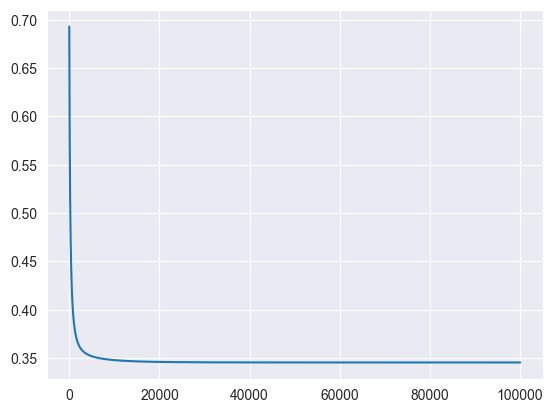

In [38]:
new_logistic_classifier.plot()

# Neural Networks

In [10]:
X_train = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
Y_train = df.iloc[:,14]
X_test = testing_df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
Y_test = testing_df.iloc[:,14]

In [11]:
combined_dataset =pd.concat([df,testing_df]).iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14]]
new_df, new_testing_df = train_test_split(combined_dataset, test_size=0.3333333333)

new_X_train = new_df.iloc[:,:-1]
new_Y_train = new_df.iloc[:,-1]
new_X_test = new_testing_df.iloc[:,:-1]
new_Y_test = new_testing_df.iloc[:,-1]

# 1 Hidden Layer

In [12]:
nodes = []
training_accuracies = []
testing_accuracies = []

for i in range(2, 14):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(i), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000)
    mlp_classifier.out_activation_ = 'logistic'
    mlp_classifier.fit(X_train,Y_train)
    nodes.append(i)
    training_accuracies.append(mlp_classifier.score(X_train, Y_train))
    testing_accuracies.append(mlp_classifier.score(X_test, Y_test))
    

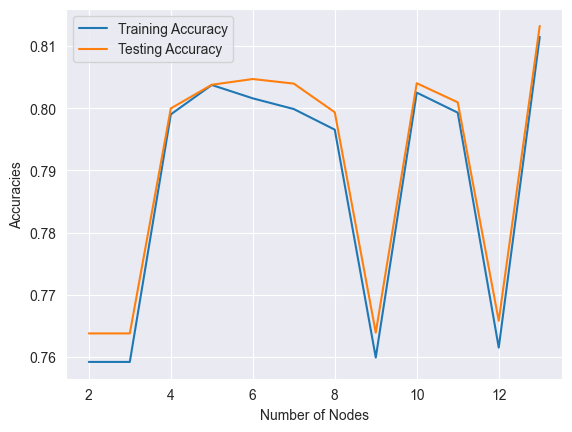

The maximum accuracy with 1 hidden layers occurs when there are 13 nodes in the first hidden layer
Max Training accuracy  0.8114615644482663
Max Testing accuracy  0.8132178613107303


In [13]:
plt.plot(nodes, training_accuracies, label="Training Accuracy")
plt.plot(nodes, testing_accuracies, label="Testing Accuracy")

plt.xlabel('Number of Nodes')
plt.ylabel('Accuracies')

plt.legend()
plt.show()

mx=0
idx=0
for i in range(len(nodes)):
    if(training_accuracies[i]+testing_accuracies[i]>mx):
        idx=i
        mx=training_accuracies[i]+testing_accuracies[i]

print("The maximum accuracy with 1 hidden layers occurs when there are",nodes[idx],"nodes in the first hidden layer")
print("Max Training accuracy ",training_accuracies[idx])
print("Max Testing accuracy ",testing_accuracies[idx])

In [14]:
nodes = []
training_accuracies = []
testing_accuracies = []

for i in range(2, 14):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(i), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000)
    mlp_classifier.out_activation_ = 'logistic'
    mlp_classifier.fit(new_X_train,new_Y_train)
    nodes.append(i)
    training_accuracies.append(mlp_classifier.score(new_X_train, new_Y_train))
    testing_accuracies.append(mlp_classifier.score(new_X_test, new_Y_test))
    

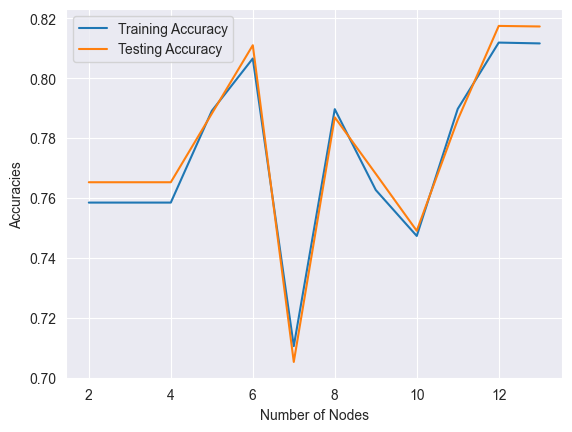

The maximum accuracy with 1 hidden layers occurs when there are 12 nodes in the first hidden layer
Max Training accuracy  0.8118915266730137
Max Testing accuracy  0.8174559302254162


In [15]:
plt.plot(nodes, training_accuracies, label="Training Accuracy")
plt.plot(nodes, testing_accuracies, label="Testing Accuracy")

plt.xlabel('Number of Nodes')
plt.ylabel('Accuracies')

plt.legend()
plt.show()

mx=0
idx=0
for i in range(len(nodes)):
    if(training_accuracies[i]+testing_accuracies[i]>mx):
        idx=i
        mx=training_accuracies[i]+testing_accuracies[i]

print("The maximum accuracy with 1 hidden layers occurs when there are",nodes[idx],"nodes in the first hidden layer")
print("Max Training accuracy ",training_accuracies[idx])
print("Max Testing accuracy ",testing_accuracies[idx])

# 2 Hidden Layers

In [16]:
mx=0
idx_i=0
idx_j=0
mx_training_accuracy = 0
mx_testing_accuracy = 0
for i in range(2, 14):
    for j in range(2,i+1):
        mlp_classifier = MLPClassifier(hidden_layer_sizes=(i,j), activation='relu', solver='adam', max_iter=1000)
        mlp_classifier.out_activation_ = 'logistic'
        mlp_classifier.fit(X_train,Y_train)
        training_accuracies = (mlp_classifier.score(X_train, Y_train))
        testing_accuracies = (mlp_classifier.score(X_test, Y_test))
        mx_training_accuracy=max(training_accuracies,mx_training_accuracy)
        mx_testing_accuracy=max(testing_accuracies,mx_testing_accuracy)
        if(training_accuracies+testing_accuracies>mx):
            idx_i=i
            idx_j=j
            mx = training_accuracies + testing_accuracies
print("The maximum accuracy with 2 hidden layers occurs when there are",idx_i,"nodes in the first hidden layer and",idx_j,"nodes in the second hidden layer")
print("Max Training accuracy ",training_accuracies)
print("Max Testing accuracy ",testing_accuracies)

The maximum accuracy with 2 hidden layers occurs when there are 13 nodes in the first hidden layer and 7 nodes in the second hidden layer
Max Training accuracy  0.7948773072080095
Max Testing accuracy  0.7960813217861311


In [17]:
mx=0
idx_i=0
idx_j=0
mx_training_accuracy = 0
mx_testing_accuracy = 0
for i in range(2, 14):
    for j in range(2,i+1):
        mlp_classifier = MLPClassifier(hidden_layer_sizes=(i,j), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000)
        mlp_classifier.out_activation_ = 'logistic'
        mlp_classifier.fit(new_X_train,new_Y_train)
        training_accuracies = (mlp_classifier.score(new_X_train, new_Y_train))
        testing_accuracies = (mlp_classifier.score(new_X_test, new_Y_test))
        mx_training_accuracy=max(training_accuracies,mx_training_accuracy)
        mx_testing_accuracy=max(testing_accuracies,mx_testing_accuracy)
        if(training_accuracies+testing_accuracies>mx):
            idx_i=i
            idx_j=j
            mx = training_accuracies + testing_accuracies
print("The maximum accuracy with 2 hidden layers occurs when there are",idx_i,"nodes in the first hidden layer and",idx_j,"nodes in the second hidden layer")
print("Max Training accuracy ",training_accuracies)
print("Max Testing accuracy ",testing_accuracies)

The maximum accuracy with 2 hidden layers occurs when there are 7 nodes in the first hidden layer and 7 nodes in the second hidden layer
Max Training accuracy  0.7987469672307361
Max Testing accuracy  0.8044960383268841


# 3 hidden layers

In [18]:
mx=0
idx_i=0
idx_j=0
idx_k=0
mx_training_accuracy = 0
mx_testing_accuracy = 0
for i in range(2, 14):
    for j in range(2,i+1):
        for k in range(2,j+1):
            mlp_classifier = MLPClassifier(hidden_layer_sizes=(i,j,k), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000)
            mlp_classifier.fit(X_train,Y_train)
            training_accuracies = (mlp_classifier.score(X_train, Y_train))
            testing_accuracies = (mlp_classifier.score(X_test, Y_test))
            if(training_accuracies+testing_accuracies>mx):
                idx_i=i
                idx_j=j
                idx_k=k
                mx = training_accuracies + testing_accuracies
                mx_training_accuracy = training_accuracies
                mx_testing_accuracy = testing_accuracies

print("The maximum accuracy with 2 hidden layers occurs when there are",idx_i,"nodes in the first hidden layer, ",idx_j,"nodes in the second hidden layer and",idx_k,"nodes in the second hidden layer")
print("Max Training accuracy ",training_accuracies)
print("Max Testing accuracy ",testing_accuracies)

The maximum accuracy with 2 hidden layers occurs when there are 7 nodes in the first hidden layer,  6 nodes in the second hidden layer and 4 nodes in the second hidden layer
Max Training accuracy  0.7662233960873438
Max Testing accuracy  0.7708985934524907


In [19]:
mx=0
idx_i=0
idx_j=0
idx_k=0
mx_training_accuracy = 0
mx_testing_accuracy = 0
for i in range(2, 14):
    for j in range(2,i+1):
        for k in range(2,j+1):
            mlp_classifier = MLPClassifier(hidden_layer_sizes=(i,j,k), activation='relu', solver='adam',learning_rate_init=0.01, max_iter=1000)
            mlp_classifier.fit(new_X_train,new_Y_train)
            training_accuracies = (mlp_classifier.score(new_X_train, new_Y_train))
            testing_accuracies = (mlp_classifier.score(new_X_test, new_Y_test))
            if(training_accuracies+testing_accuracies>mx):
                idx_i=i
                idx_j=j
                idx_k=k
                mx = training_accuracies + testing_accuracies
                mx_training_accuracy = training_accuracies
                mx_testing_accuracy = testing_accuracies

print("The maximum accuracy with 2 hidden layers occurs when there are",idx_i,"nodes in the first hidden layer, ",idx_j,"nodes in the second hidden layer and",idx_k,"nodes in the second hidden layer")
print("Max Training accuracy ",training_accuracies)
print("Max Testing accuracy ",testing_accuracies)

The maximum accuracy with 2 hidden layers occurs when there are 8 nodes in the first hidden layer,  5 nodes in the second hidden layer and 4 nodes in the second hidden layer
Max Training accuracy  0.7600810785909524
Max Testing accuracy  0.7670290522695166
